In [1]:
import matplotlib.pyplot as plt

from superfv import EulerSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 100

sim_p0 = EulerSolver(
    ic=ic.sod_shock_tube_1d,
    bcx="free",
    nx=N,
    p=0,
)
sim_p0.run(0.245)

sim_mh = EulerSolver(
    ic=ic.sod_shock_tube_1d,
    bcx="free",
    nx=N,
    flux_recipe=2,
    p=1,
    MUSCL=True,
)
sim_mh.musclhancock(0.245)

Step #65 @ t=2.45e-01 | dt=1.86e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
Step #66 @ t=2.45e-01 | dt=3.20e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   


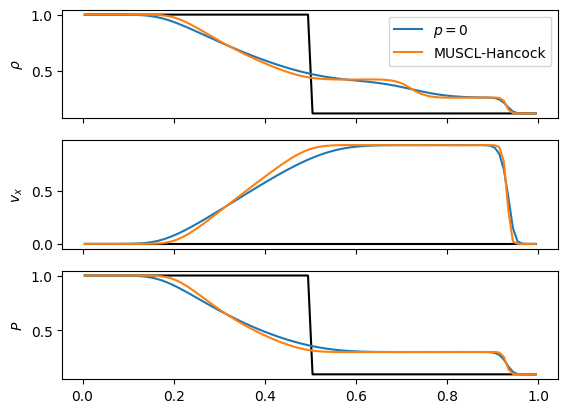

In [3]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

vis.plot_1d_slice(sim_p0, axs[0], "rho", t=0, color="k")
vis.plot_1d_slice(sim_p0, axs[0], "rho", label=r"$p=0$")
vis.plot_1d_slice(sim_mh, axs[0], "rho", label="MUSCL-Hancock")

vis.plot_1d_slice(sim_p0, axs[1], "vx", t=0, color="k")
vis.plot_1d_slice(sim_p0, axs[1], "vx")
vis.plot_1d_slice(sim_mh, axs[1], "vx")

vis.plot_1d_slice(sim_p0, axs[2], "P", t=0, color="k")
vis.plot_1d_slice(sim_p0, axs[2], "P")
vis.plot_1d_slice(sim_mh, axs[2], "P")

axs[0].legend()